# **Logistic, Random Forest, or KNN? (Core)**

**Name:** Kellianne Yang

## Learning Objectives:

- Create the best classification model to evaluate the data.

## Assignment:

Using the Wisconsin Breast Cancer Dataset, predict whether a tumor cell is malignant (m) or benign (b).

https://docs.google.com/spreadsheets/d/e/2PACX-1vTZf6XIYPLjxmCS8BzzEot1DaW4ns7P2q1CVqnZ6qw9f-A3bkCPbXX3H9vOE2_zrGKSxy4ZMaTf7lt4/pub?gid=594194017&single=true&output=csv


Your task in this assignment will be to build the best model you can to diagnose cancer and report on your results.



## Preliminary Steps

In [ ]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# load data
filename = '/content/drive/MyDrive/Coding Dojo/Stack 2: Machine Learning (Weeks 5-8)/07 Week 7: Classification Models/cancer.csv'
df = pd.read_csv(filename, index_col = 'id')

In [ ]:
# inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [ ]:
df.sample(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
859283,M,14.78,23.94,97.40,668.3,0.11720,0.14790,0.12670,0.09029,0.1953,...,17.31,33.39,114.60,925.1,0.16480,0.34160,0.30240,0.16140,0.3321,0.08911
9010872,B,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,...,18.13,25.45,117.20,1009.0,0.13380,0.16790,0.16630,0.09123,0.2394,0.06469
897604,B,12.99,14.23,84.08,514.3,0.09462,0.09965,0.03738,0.02098,0.1652,...,13.72,16.91,87.38,576.0,0.11420,0.19750,0.14500,0.05850,0.2432,0.10090
8911800,B,13.59,17.84,86.24,572.3,0.07948,0.04052,0.01997,0.01238,0.1573,...,15.50,26.10,98.91,739.1,0.10500,0.07622,0.10600,0.05185,0.2335,0.06263
8910721,B,14.29,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,...,14.91,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
901028,B,13.87,16.21,88.52,593.7,0.08743,0.05492,0.01502,0.02088,0.1424,...,15.11,25.58,96.74,694.4,0.11530,0.10080,0.05285,0.05556,0.2362,0.07113
88995002,M,20.73,31.12,135.70,1419.0,0.09469,0.11430,0.13670,0.08646,0.1769,...,32.49,47.16,214.00,3432.0,0.14010,0.26440,0.34420,0.16590,0.2868,0.08218
916799,M,18.31,20.58,120.80,1052.0,0.10680,0.12480,0.15690,0.09451,0.1860,...,21.86,26.20,142.20,1493.0,0.14920,0.25360,0.37590,0.15100,0.3074,0.07863
8711216,B,16.84,19.46,108.40,880.2,0.07445,0.07223,0.05150,0.02771,0.1844,...,18.22,28.07,120.30,1032.0,0.08774,0.17100,0.18820,0.08436,0.2527,0.05972


In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df['diagnosis'].value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [ ]:
# assign target variable (y) and feature matrix (X)
target = 'diagnosis'
y = df[target]
X = df.drop(columns = target)

In [ ]:
# check
print(f"y: \n{y}")
print()
print(f"X: \n{X}")

y: 
id
842302      M
842517      M
84300903    M
84348301    M
84358402    M
           ..
926424      M
926682      M
926954      M
927241      M
92751       B
Name: diagnosis, Length: 569, dtype: object

X: 
          radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                               
842302          17.99         10.38          122.80     1001.0   
842517          20.57         17.77          132.90     1326.0   
84300903        19.69         21.25          130.00     1203.0   
84348301        11.42         20.38           77.58      386.1   
84358402        20.29         14.34          135.10     1297.0   
...               ...           ...             ...        ...   
926424          21.56         22.39          142.00     1479.0   
926682          20.13         28.25          131.20     1261.0   
926954          16.60         28.08          108.30      858.1   
927241          20.60         29.33          140.10     1265.0  

In [ ]:
# model validation (train/test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
# check
print(f"X_train: {X_train.shape} \n\
X_test: {X_test.shape} \n\
y_train: {y_train.shape} \n\
y_test: {y_test.shape}")

X_train: (426, 30) 
X_test: (143, 30) 
y_train: (426,) 
y_test: (143,)


In [ ]:
# define classification metrics function
def class_metrics(model_pipe, X_train, X_test, y_train, y_test, name):
  
  # fit on training data
  model_pipe.fit(X_train, y_train)

  # print name of model
  print(f"{name} metrics:")

  # create test data predictions
  test_pred = model_pipe.predict(X_test)

  # print classification report
  print(classification_report(y_test, test_pred))
  
  # display confusion matrix
  display(ConfusionMatrixDisplay.from_predictions(y_test, 
                                                  test_pred, 
                                                  normalize='true'))

## 1) Logistic Regression



a) Start by creating and evaluating a default logistic regression model using appropriate metrics and a confusion matrix.



In [ ]:
# create pipeline with scaler and default logistic regression model
logreg_def_pipe = make_pipeline(StandardScaler(), LogisticRegression())

Logistic Regression Default Model metrics:
              precision    recall  f1-score   support

           B       0.99      0.98      0.98        89
           M       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



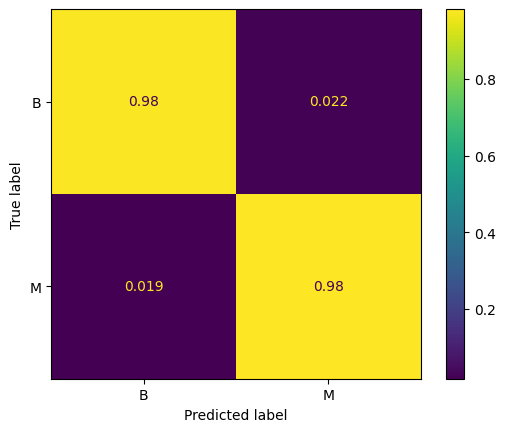

In [ ]:
# evaluate default logistic regression model
logreg_def_metrics = class_metrics(logreg_def_pipe, 
                                   X_train, 
                                   X_test, 
                                   y_train, 
                                   y_test, 
                                   'Logistic Regression Default Model')

logreg_def_metrics

b) Then, use GridSearchCV to tune the penalty type and C values (inverse regularization strength) for the model to find the optimal combination of hyperparameter values, and evaluate the resulting tuned model.



NOTE: Make sure to select an appropriate solver that would allow you to explore both L1 and L2 penalties. In order to choose the right solver, LogisticRegression documentation to see which solvers support which penalty types.



In [ ]:
# according to scikit-learn documentation 
# (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
# solvers that support both l1 and l2 penalties are 'liblinear' and 'saga'

# documentation notes that 'liblinear' is better for small datasets than 'saga',
# so will choose 'liblinear'

When you create your parameter dictionary:



- Your penalties should be ['l1', 'l2']


- Your C values should be logarithmic: [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000]


In [ ]:
# make logreg model to tune
logreg_tuned = LogisticRegression(solver = 'liblinear', max_iter = 1000)

In [ ]:
# make parameter grid for GridSearchCV
logreg_param_grid = {'penalty': ['l1', 'l2'],
                     'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 
                                  10000]}

In [ ]:
# make logreg grid search
logreg_grid_search = GridSearchCV(logreg_tuned, logreg_param_grid)

In [ ]:
# fit logreg grid search on training data
logreg_grid_search.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']})

In [ ]:
# get the best parameters from the grid search
logreg_grid_search.best_params_

{'C': 100, 'penalty': 'l1'}

In [ ]:
# instantiate tuned model
logreg_tuned_model = logreg_grid_search.best_estimator_
logreg_tuned_model

LogisticRegression(C=100, max_iter=1000, penalty='l1', solver='liblinear')

In [ ]:
# instantiate a model with the best parameters
logreg_tuned_pipe = make_pipeline(StandardScaler(), 
                                    logreg_tuned_model)

Logistic Regression Tuned Model metrics:
              precision    recall  f1-score   support

           B       0.99      0.91      0.95        89
           M       0.87      0.98      0.92        54

    accuracy                           0.94       143
   macro avg       0.93      0.95      0.93       143
weighted avg       0.94      0.94      0.94       143



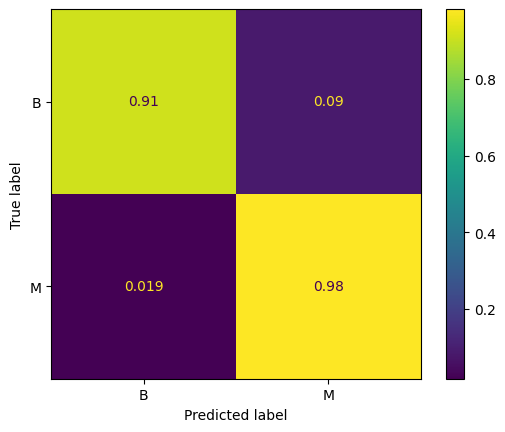

In [ ]:
# evaluate the model with the best parameters
logreg_tuned_metrics = class_metrics(logreg_tuned_pipe, 
                                       X_train, 
                                       X_test, 
                                       y_train, 
                                       y_test, 
                                       'Logistic Regression Tuned Model')

logreg_tuned_metrics

In [ ]:
# logreg_def_metrics
# logreg_optimal_metrics

c) Make sure you have evaluated both the default and the tuned versions using appropriate metrics and a confusion matrix.



d) In a text cell, address these questions for your logistic regression models:

- Which hyperparameters did you tune?
- What values for those hyperparameters led to the best-tuned model?


I tuned the "C" and the "penalty" hyperparameters for the logistic regression model. The values that led to the best-tuned model according to GridSearchCV were "C" = 100 and "penalty" = "l1". 

The non-tuned (default) model had a higher accuracy score than the tuned ("optimal") model (non-tuned model's accuracy was about 98% and tuned model's accuracy was about 94%). The default hyperparameter value for "C" is 1 and for "penalty" is "l2". 

## 2) k-nearest neighbors



a) Start by creating and evaluating a default knn model using appropriate metrics and a confusion matrix



In [ ]:
# create pipeline with scaler and default knn model
knn_def_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

KNN Default Model metrics:
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        89
           M       0.94      0.94      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



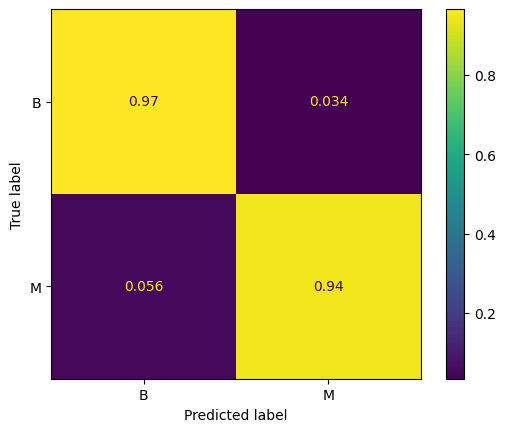

In [ ]:
# evaluate default knn model
knn_def_metrics = class_metrics(knn_def_pipe,
                                X_train,
                                X_test,
                                y_train,
                                y_test,
                                'KNN Default Model')

knn_def_metrics

b) The, use GridSearchCV to tune the model.

- Check the KNN documentation to choose hyperparameters to tune. 

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



In [ ]:
# some possible hyperparameters to tune:
# n_neighbors in range(1, 31)
# distance: euclidean, manhattan, cosine, minkowski
# weights assigned to neighbors: uniform, distance-based
# type of algorithm to find nearest neighbors: brute force, tree-based
# leaf size

In [ ]:
# make knn model to tune
knn_tuned = KNeighborsClassifier()

In [ ]:
# make parameter grid for GridSearchCV
knn_param_grid = {'n_neighbors': list(range(1, 31)),
                  'metric': ['euclidean', 'manhattan', 'cosine', 'minkowski'],
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'leaf_size': [1, 10, 20, 30, 40, 50]
                  }

In [ ]:
# make knn grid search
knn_grid_search = GridSearchCV(knn_tuned, knn_param_grid)

In [ ]:
# fit knn grid search on training data
knn_grid_search.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3600 fits failed out of a total of 28800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_base.py", line 493, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.9/dist-packages/sklea

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 10, 20, 30, 40, 50],
                         'metric': ['euclidean', 'manhattan', 'cosine',
                                    'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']})

In [ ]:
# get the best parameters from the grid search
knn_grid_search.best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'manhattan',
 'n_neighbors': 5,
 'weights': 'uniform'}

In [ ]:
# instantiate tuned model
knn_tuned_model = knn_grid_search.best_estimator_
knn_tuned_model

KNeighborsClassifier(leaf_size=1, metric='manhattan')

In [ ]:
# instantiate a model with the best parameters
knn_tuned_pipe = make_pipeline(StandardScaler(), 
                                 knn_tuned_model)

KNN Tuned Model metrics:
              precision    recall  f1-score   support

           B       0.98      0.98      0.98        89
           M       0.96      0.96      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



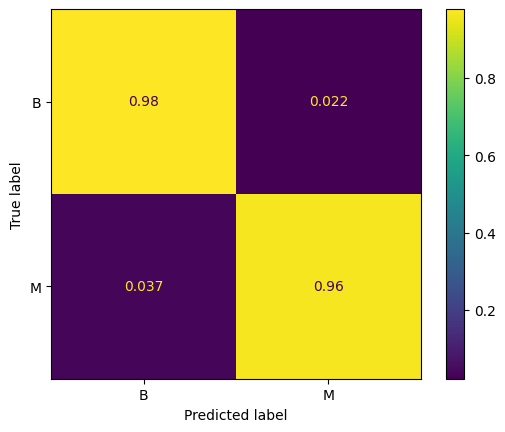

In [ ]:
# evaluate the model with the best parameters
knn_tuned_metrics = class_metrics(knn_tuned_pipe, 
                                    X_train, 
                                    X_test, 
                                    y_train, 
                                    y_test, 
                                    'KNN Tuned Model')

knn_tuned_metrics

c) Make sure you have evaluated both the default and the tuned versions using appropriate metrics and a confusion matrix.



d) In a text cell, address these questions for your KNN models:

- Which hyperparameters did you tune?
- What values for those hyperparameters led to the best-tuned model?



I tuned the algorithm, leaf_size, metric, n_neighbors, and weights hyperparameters for the KNN model. The values that led to the best-tuned model according to GridSearchCV were:
- algorithm: 'auto'
- leaf_size: 1
- metric: 'manhattan'
- n_neighbors: 5
- weights: 'uniform'

The tuned (optimal) model had a higher accuracy score than the non-tuned (default) model (tuned model's accuracy was about 97% and non-tuned model's accuracy was about 96%). 

## 3) Random Forest



a) Start by creating and evaluating a default random forest model using appropriate metrics and a confusion matrix



In [ ]:
# create pipeline with scaler and default random forest model
rf_def_pipe = make_pipeline(StandardScaler(), RandomForestClassifier())

Random Forest Default Model metrics:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        89
           M       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



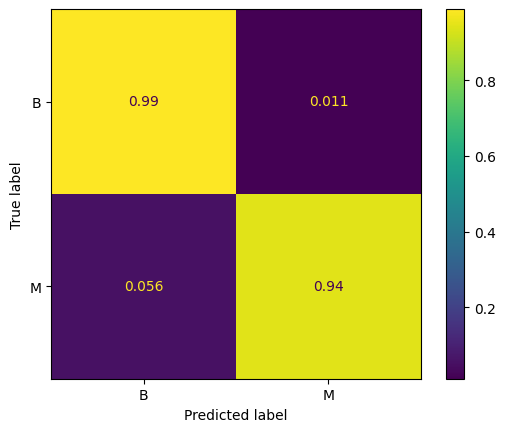

In [ ]:
# evaluate default rf model
rf_def_metrics = class_metrics(rf_def_pipe,
                               X_train,
                               X_test,
                               y_train,
                               y_test,
                               'Random Forest Default Model')

rf_def_metrics

b) The, use GridSearchCV to tune the model.

- Check the random forest documentation to choose hyperparameters to tune. 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html




In [ ]:
# possible parameters to tune
# n_estimators
# max_features
# max_depth
# min_samples_split
# min_samples_leaf
# max_leaf_nodes
# criterion: gini, entropy, log_loss
#                  'min_samples_split': [2, 4, 6, 8, 10],
#                  'min_samples_leaf': [1, 2, 3, 4, 5],
#                  'max_leaf_nodes': [10, 50, 100, 150, None]

In [ ]:
# make rf model to tune
rf_tuned = RandomForestClassifier()

In [ ]:
# make parameter grid for GridSearchCV
rf_param_grid = {'n_estimators': [50, 100, 150],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'max_depth': [5, 10, 15],
                  }

In [ ]:
# make rf grid search
rf_grid_search = GridSearchCV(rf_tuned, rf_param_grid)

In [ ]:
# fit rf grid search on training data
rf_grid_search.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'n_estimators': [50, 100, 150]})

In [ ]:
# get the best parameters from the grid search
rf_grid_search.best_params_

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 100}

In [ ]:
# instantiate tuned model
rf_tuned_model = rf_grid_search.best_estimator_
rf_tuned_model

RandomForestClassifier(max_depth=15)

In [ ]:
# instantiate a model with the best parameters
rf_tuned_pipe = make_pipeline(StandardScaler(), 
                                 rf_tuned_model)

Random Forest Tuned Model metrics:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        89
           M       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



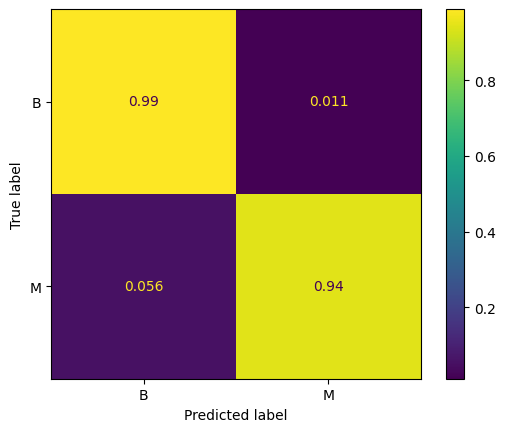

In [ ]:
# evaluate the model with the best parameters
rf_tuned_metrics = class_metrics(rf_tuned_pipe, 
                                    X_train, 
                                    X_test, 
                                    y_train, 
                                    y_test, 
                                    'Random Forest Tuned Model')

rf_tuned_metrics

c) Make sure you have evaluated both the default and the tuned versions using appropriate metrics and a confusion matrix.



d) In a text cell, address these questions for your random forest models:

- Which hyperparameters did you tune?
- What values for those hyperparameters led to the best-tuned model?


I tuned 'max_depth', 'n_estimators', and 'max_features'. GridSearchCV chose max_depth = 15, n_estimators = 150 and max_features = log2 for the best model out of those tried. 

The tuned model produced the same accuracy score and confusion matrix values as the default model. To get a better model, more hyperparameters and/or more values for hyperparameters would have to be tried. 

## 4) Answer these questions in a text cell at the end of your notebook:



- What do 'false positives' and 'false negatives' mean for this problem? Which is worse?


For this data, a 'false positive' would be a guess by the model that a patient has malignant breast cancer, but the cancer is actually benign. A 'false negative' would be a guess by the model that the patient's cancer is benign, but it is actually malignant. 

In this case, without knowing the costs associated with further testing or treatment, the worse option would be a 'false negative.' This is because I think a person living with malignant cancer without treatment would be worse than further testing on a person or even treatment, only to find out later that their cancer was benign (unless the treatment options are life-threatening). 

- Which of your models would you recommend for production? Which metric or metrics did you use to decide that, and why?


If the goal is to reduce false negatives, as I believe it should be for the reasons above, I would recommend the model with the highest recall. Higher recall results in fewer false negatives. 

Of all the models tested above, the one with the highest recall score was the default logistic regression model, with a macro average recall score of 0.98. For this reason, I would recommend putting the default logistic regression model into production. 